# **Comparar Algoritmos**
# *Modelos de Clasificion y Regresión*
El objetivo: 
* Realizar entrenamiento para los tipos de modelos.
* Realizar Stratified K-Fold Cross-Validation (Validación cruzada estratificada de K particiones)
* Revisar los resultados obtenidos

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score,cross_val_predict,KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

import seaborn as sns

import warnings
from sys import path
import os
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions

warnings.filterwarnings('ignore')

../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021c2.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv
../resources/v2_hitosExitoFalloColESol1Prograna.csv
../resources/v2_hitosExitoFalloSol1Programa.csv


In [28]:
df = pd.read_csv("../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True)

In [29]:
# Convertir la columna "sol1" a números de punto flotante
df['sol1'] = df['sol1'].astype(float)
df['exitosos'] = df['exitosos'].astype(int)
df['fallidos'] = df['fallidos'].astype(int)

In [30]:
#creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df['aprobado']=df.apply(lambda x: funtions.set_in_aprobado_nota(x['sol1']),axis = 1 )
#revisamos la existencia de la nueva columna.
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


# *Modelos de Clasificion*

`DecisionTreeClassifier`:

Es un modelo de clasificación basado en árboles de decisión.
Divide recursivamente el espacio de características en subespacios más pequeños para clasificar las muestras.
Cada nodo interno representa una pregunta o prueba sobre una característica, y las hojas representan las etiquetas de clase.

`LogisticRegression`:

Es un modelo de clasificación que utiliza la función logística para estimar las probabilidades de pertenencia a una clase.
Se basa en una combinación lineal de características que se transforma mediante la función logística para obtener una salida entre 0 y 1.
Puede manejar problemas de clasificación binaria y también se puede extender a problemas de clasificación multiclase.

`RandomForestClassifier`:

Es un modelo de clasificación que utiliza un conjunto de árboles de decisión llamados bosque aleatorio.
Cada árbol se entrena con una muestra aleatoria del conjunto de datos y produce una clasificación.
El resultado final se determina por votación o promedio de las predicciones de los árboles individuales.

`XGBClassifier`:

Es un modelo de clasificación basado en XGBoost (Extreme Gradient Boosting).
Utiliza una combinación de múltiples árboles débiles, donde cada árbol se ajusta a los errores del árbol anterior.
XGBoost utiliza regularización y técnicas de poda para controlar el sobreajuste y mejorar el rendimiento.

`NOTA: Para estos modelos se utiliza la columna aprobado que equivale a 1 aprobado, reprobado 0, provienen de la columna sol1 donde nota igual o superior a 4 es aprobado o 1`

In [31]:
# Selección de características y variable objetivo para los modelos de clasificacion.
y = df['aprobado']
X = df[
    [
        "exitosos",
        "fallidos",
        "hito1",
        "hito2",
        "e0",
        "e1",
        "e3",
        "e4",
        "e6",
        "e7",
        "e9",
        "e10",
        "e11",
        "e12",
        "e13",
        "e17",
        "e18",
        "e21",
        "e22",
        "e23",
        "e25",
        "e26",
        "e28",
        "e29",
        "e32",
        "e35",
        "e37",
        "e38",
        "e42",
        "e44"
    ]
]

In [32]:
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# *Comparación de Métricas entre Modelos*

`Accuracy (Precisión)`:
El accuracy, o precisión, es una métrica que mide la proporción de instancias clasificadas correctamente sobre el total de instancias en los datos de prueba. En otras palabras, es la capacidad del modelo para predecir correctamente tanto las instancias positivas como las negativas. Un valor de accuracy alto indica un buen rendimiento general del modelo en la clasificación.
+ `Fórmula:
Accuracy = (Verdaderos Positivos + Verdaderos Negativos) / Total de instancias`

`Precision (Precisión)`:
La precision es una métrica que mide la proporción de instancias clasificadas como positivas que son realmente positivas. Es la capacidad del modelo para evitar hacer falsas afirmaciones de que una instancia pertenece a la clase positiva cuando no lo hace. Una precision alta indica que el modelo tiene una baja tasa de falsos positivos.
+ `Fórmula:
Precision = Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos)`

`Recall (Recall o Sensibilidad)`:
El recall, también conocido como sensibilidad o tasa de verdaderos positivos, mide la proporción de instancias positivas que son correctamente identificadas por el modelo. Es la capacidad del modelo para detectar y clasificar correctamente las instancias positivas. Un recall alto indica que el modelo tiene una baja tasa de falsos negativos.
+ `Fórmula:
Recall = Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos)`

`F1 Score`:
El F1 score es una métrica que combina la precision y el recall en una sola medida. Es la media armónica de la precision y el recall, y proporciona una evaluación equilibrada del rendimiento del modelo. El F1 score es especialmente útil cuando hay un desequilibrio entre las clases o cuando se desea tener un equilibrio entre la precision y el recall.
+ `Fórmula:
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)`

`Stratified K-Fold Cross-Validation (Validación cruzada estratificada de K particiones)`:
La validación cruzada estratificada de K particiones, o Stratified K-Fold CV, es una variante de K-Fold CV que tiene en cuenta la distribución de las clases en los datos al realizar la partición. En lugar de realizar la partición de forma aleatoria, Stratified K-Fold CV garantiza que la proporción de clases en cada partición sea lo más similar posible a la proporción de clases en el conjunto de datos original. Esto es especialmente útil cuando hay un desequilibrio entre las clases en los datos.

In [33]:
# Definir los modelos
models_clasificacion = [
    DecisionTreeClassifier(
        criterion='gini', 
        max_depth=5, 
        min_samples_split=10, 
        min_samples_leaf=1
    ),
    LogisticRegression(
        penalty='l2', 
        C=1.0, 
        solver='lbfgs', 
        max_iter=150
    ),
    RandomForestClassifier(
        max_depth=10, 
        min_samples_split=10, 
        min_samples_leaf=5,
        random_state= 1502,
        n_estimators=500
    ),
    XGBClassifier(
        learning_rate=0.1, 
        max_depth=10, 
        n_estimators=150, 
        subsample=1.0
    )
]

# Definir las métricas
metrics = [
    'accuracy',
    'precision',
    'recall',
    'f1'
]

# Realizar Stratified K-Fold Cross-Validation en los datos de entrenamiento y obtener las métricas para cada modelo
results_train = {}
for model in models_clasificacion:
    model_name = model.__class__.__name__
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo en los datos de entrenamiento
    model_results = {}
    for metric in metrics:
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=metric)
        model_results[metric] = scores
    results_train[model_name] = model_results


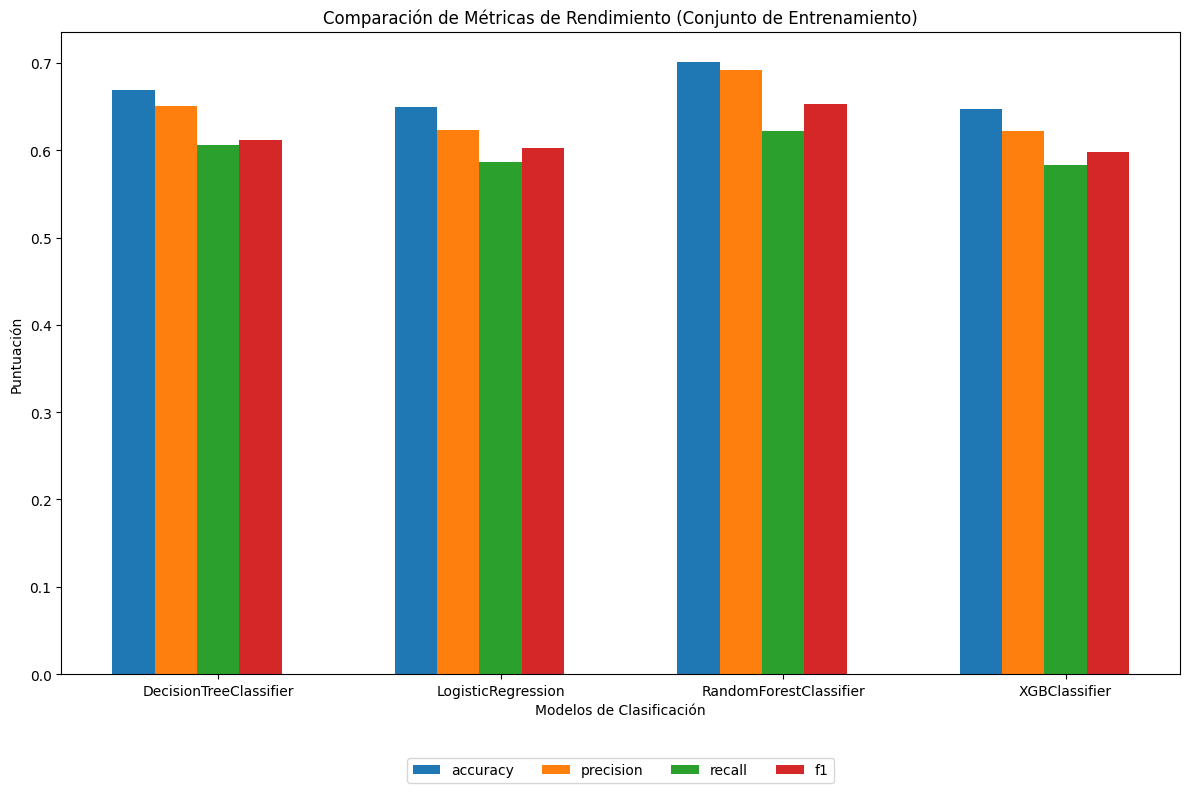

In [34]:
# Obtener las métricas y los nombres de los modelos
metrics = list(results_train[models_clasificacion[0].__class__.__name__].keys())
model_names = list(results_train.keys())

# Crear la figura y los subplots para el conjunto de entrenamiento
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(model_names))
width = 0.15

# Crear las barras para cada modelo y métrica
for i, metric in enumerate(metrics):
    scores = [np.mean(results_train[model_name][metric]) for model_name in model_names]
    ax.bar(x + i * width, scores, width, label=metric)

# Configurar el eje x y las etiquetas
ax.set_xticks(x + len(metrics) * width / 2)
ax.set_xticklabels(model_names)
plt.xlabel('Modelos de Clasificación')
plt.ylabel('Puntuación')
plt.title('Comparación de Métricas de Rendimiento (Conjunto de Entrenamiento)')

# Colocar la leyenda en el eje X
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=len(metrics))

# Mostrar el gráfico de barras para el conjunto de entrenamiento
plt.tight_layout()
plt.savefig('E:\\dev\\tesis\\LaTeX\\img\\compara_algoritmos\\metricasEntreModelosClasificacion.png')
plt.show()

# *Analisis breve de los resultados del grafico de Clasificación*
El modelo de clasificacion XGBClassifier tiene un mejor equilibrio F1 en comparacion a los otros modelos.
Mientras que el modelo de mas bajos resultados en F1 es LogisticRegression.

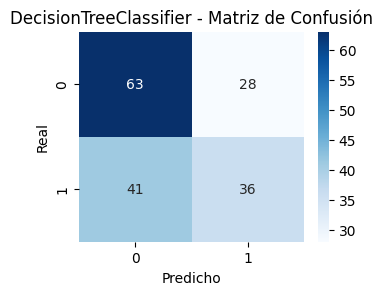

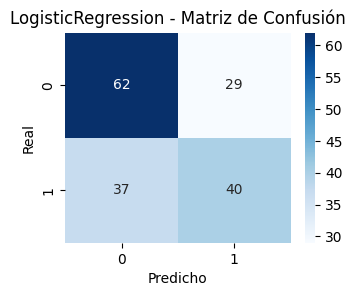

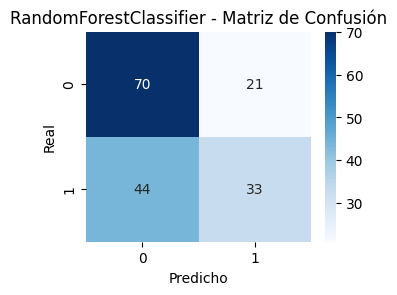

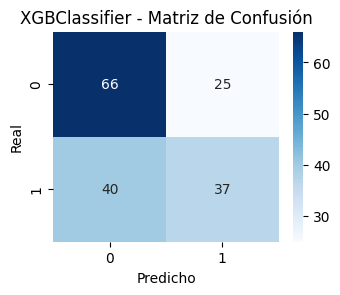

In [35]:
# Realizar la predicción en el conjunto de prueba y obtener las métricas
results_test = {}
for model in models_clasificacion:
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    model_results = {
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    results_test[model_name] = model_results

# Obtener y graficar la matriz de confusión para cada modelo en el conjunto de prueba
for model_name, model_results in results_test.items():
    plt.figure(figsize=(8, 6))
    for i, (metric, scores) in enumerate(model_results.items()):
        if metric != 'confusion_matrix':
            continue
        plt.subplot(2, 2, i+1)
        plt.title(f'{model_name} - Matriz de Confusión')
        sns.heatmap(scores, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        filename = f'E:\\dev\\tesis\\LaTeX\\img\\compara_algoritmos\\matrizConfusionClasificacion_{model_name}.png'
        plt.savefig(filename)
    plt.show()

# *Modelos de Regresión*

`LinearRegression`:

Es un modelo de regresión lineal que busca establecer una relación lineal entre las características y la variable objetivo continua.
Se basa en ajustar una línea recta a los datos que minimiza la suma de los errores cuadráticos.
Estima los coeficientes de las características para predecir los valores de la variable objetivo.

`DecisionTreeRegressor`:

Es un modelo de regresión basado en árboles de decisión.
Divide recursivamente el espacio de características en subespacios más pequeños para predecir los valores de las muestras.
Cada nodo interno representa una pregunta o prueba sobre una característica, y las hojas representan los valores de regresión.

`KNeighborsRegressor`:

Es un modelo de regresión basado en vecinos más cercanos (K-Nearest Neighbors).
Estima el valor de la variable objetivo mediante la media (promedio) de los valores de los K vecinos más cercanos en el espacio de características.
Puede manejar problemas de regresión con múltiples características y valores continuos.

`NOTA: Para estos modelos se utiliza la columna sol1 donde nota igual o superior a 4 es aprobado`

# *Medidas de rendimiento de cada modelo*
`MSE (Mean Squared Error) - Error Cuadrático Medio`: Es la media de los errores al cuadrado entre las predicciones y los valores reales. El MSE proporciona una medida de la calidad general del modelo, donde valores más bajos indican que las predicciones se ajustan mejor a los datos reales.

`MAE (Mean Absolute Error) - Error Absoluto Medio`: Es la media de los errores absolutos entre las predicciones y los valores reales. El MAE representa la magnitud promedio de los errores de predicción y se utiliza para evaluar la precisión del modelo. Valores más bajos indican una mejor precisión.

`R2 (Coeficiente de determinación)`: Es una medida de qué tan bien se ajustan las predicciones del modelo a los datos reales. R2 varía entre 0 y 1, donde 1 indica un ajuste perfecto del modelo a los datos. Un valor más cercano a 1 indica un mejor ajuste del modelo.

In [36]:
# Selección de características y variable objetivo para los modelos de clasificacion.
y = df['sol1']
X = df[
    [
        "exitosos",
        "fallidos",
        "hito1",
        "hito2",
        "e0",
        "e1",
        "e3",
        "e4",
        "e6",
        "e7",
        "e9",
        "e10",
        "e11",
        "e12",
        "e13",
        "e17",
        "e18",
        "e21",
        "e22",
        "e23",
        "e25",
        "e26",
        "e28",
        "e29",
        "e32",
        "e35",
        "e37",
        "e38",
        "e42",
        "e44"
    ]
]

In [37]:
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [38]:
# Definir los modelos de regresión
models_regresion = [
    LinearRegression(),
    DecisionTreeRegressor(),
    KNeighborsRegressor()
]

# Definir las métricas de rendimiento
metrics = [
    'MSE',
    'MAE',
    'R2'
]

# Realizar K-Fold Cross-Validation en los datos de entrenamiento y obtener las métricas para cada modelo
results = {}
for model in models_regresion:
    model_name = model.__class__.__name__
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo con los datos de entrenamiento
    y_pred = cross_val_predict(model, X_train, y_train, cv=cv)
    model_results = {}
    for metric in metrics:
        if metric == 'MSE':
            score = mean_squared_error(y_train, y_pred)
        elif metric == 'R2':
            score = r2_score(y_train, y_pred)
        model_results[metric] = score
    results[model_name] = model_results

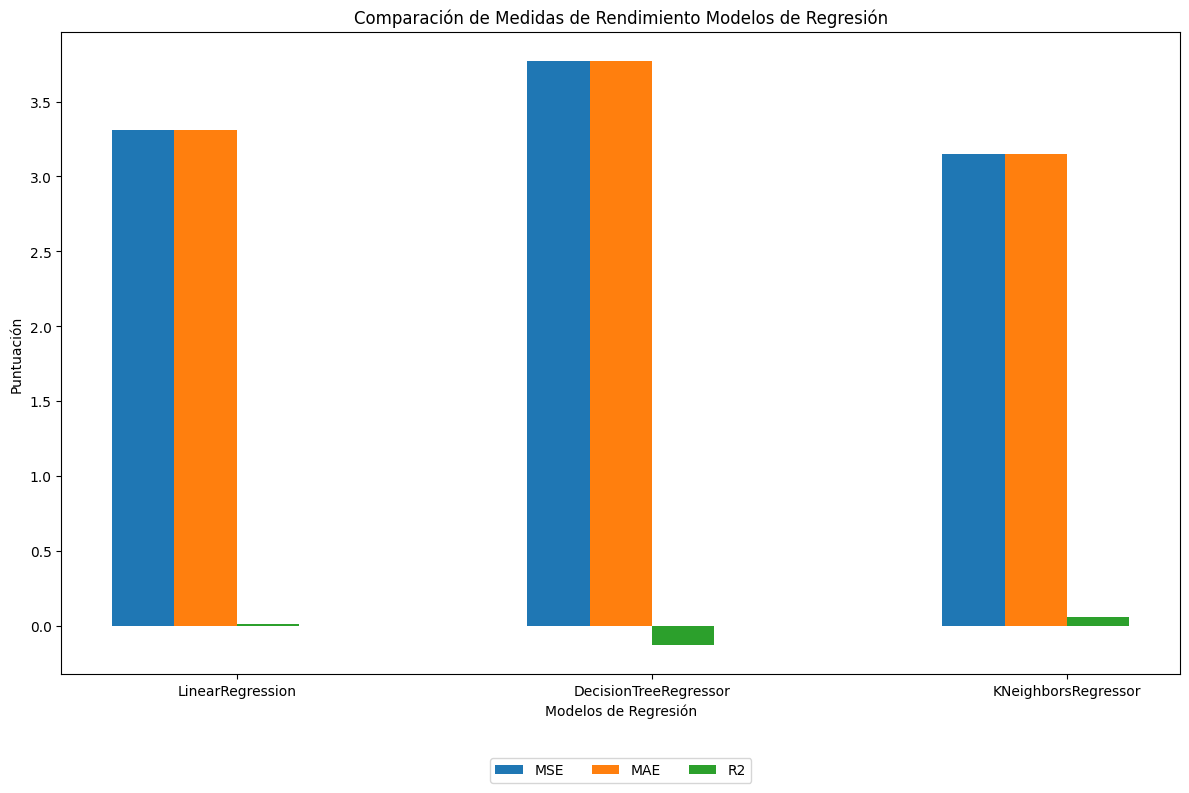

In [39]:
# Obtener las métricas y los nombres de los modelos
metrics = list(results[models_regresion[0].__class__.__name__].keys())
model_names = list(results.keys())

# Crear la figura y los subplots
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(model_names))
width = 0.15

# Crear las barras para cada modelo y métrica
for i, metric in enumerate(metrics):
    scores = [np.mean(results[model_name][metric]) for model_name in model_names]
    ax.bar(x + i * width, scores, width, label=metric)

# Configurar el eje x y las etiquetas
ax.set_xticks(x + len(metrics) * width / 2)
ax.set_xticklabels(model_names)
plt.xlabel('Modelos de Regresión')
plt.ylabel('Puntuación')
plt.title('Comparación de Medidas de Rendimiento Modelos de Regresión')

# Colocar la leyenda en el eje X
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=len(metrics))

# Mostrar el gráfico de barras
plt.tight_layout()
plt.savefig('E:\\dev\\tesis\\LaTeX\\img\\compara_algoritmos\\metricasEntreModelosRegresion.png')
plt.show()

# *Analisis breve de los resultados del grafico de regresión*
Los resultados obtenidos del graficos no son muy alentadores para modelos de regresión.

`Conclusión: podemos determinar que los mejores resultados los podemos obtener por medio de modelos de clasificacion y el de mejor rendimiento es RandomForesClassifier`